# An Introduction to Quantum Computing by Qiskit

To install qiskit simply open the terminal and run
`pip install qiskit`


In [1]:
%%capture
!pip install qiskit

After running this command, you should have qiskit successfully installed in your system. 
We'll use jupyter notebook for our programs. To open jupyter notebook run
`jupyter notebook`
which will open a notebook and you can create a new file to start coding!

We begin by importing the qiskit module.

In [2]:
from qiskit import *

Let us start by creating 1 quantum register and 1 classical register. We do this by the `QuantumRegister` and the `ClassicalRegister` functions respectively, and as the argument, we pass the number of bits we want.

In [3]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

Then we built a QuantumCircuit composed of the two classical and quantum bits by running


In [4]:
qc = QuantumCircuit(qr, cr)

Here the variable 'qc' has the quantum circuit in it. To draw the circuit at any point, we use the `draw()` function

In [5]:
qc.draw()

q0_0: 
      
c0_0:

We could have also done the above 4 lines by the `QuantumCircuit()` function.

In [6]:
qc = QuantumCircuit(1,1)
qc.draw()

q_0: 
     
c_0:

Here the first argument is the number of quantum bits, and the second argument is the number of classical bits.

By convention, all the qubits are initialized at the state $|0\rangle$. Now let us look at some essential gates which we use to manipulate these qubits. 

### Hadamard Gate 
Coding a Hadamard gate is as simple as

In [7]:
qc.h(0)

This adds a Hadamard gate on the number of qubits passed as the argument (Remember that arrays are numbered from 0 in python)

Let's draw the circuit again, and this time we'll beautify our circuits with matplotlib 

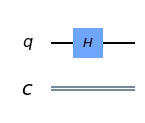

In [8]:
%matplotlib inline 
qc.draw('mpl')

The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

## Simulating circuits with Aer

Qiskit Aer is the package used for simulating quantum circuits. It provides many different backends for doing a simulation. 

To simulate the above circuit, let's choose our backend as the qasm simulator.


In [9]:
simulator = Aer.get_backend('qasm_simulator')

Next, we execute the circuit on the simulator and store the results in a variable called result and plot it's histogram.

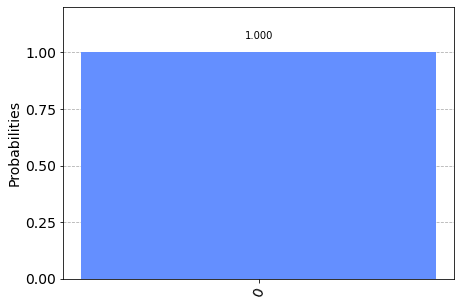

In [10]:
from qiskit.visualization import plot_histogram

job = execute(qc, backend=simulator)
result = job.result()
plot_histogram(result.get_counts(qc))

This plot may not make any sense at first, but keep in mind that the qasm simulator returns the counts on the classical register. Since we have not done any measurement on the circuit, it just gives us all counts on the default value of the classical register, which is 0.

However, if we measure the circuit before reading the counts, we see a much more familiar output. To measure, we use the `measure()` function and pass the quantum bits as the first argument and the classical bits into which we want the measurement as the second argument.


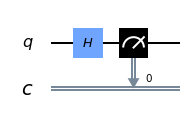

In [11]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(range (1), range (1))
qc.draw('mpl')

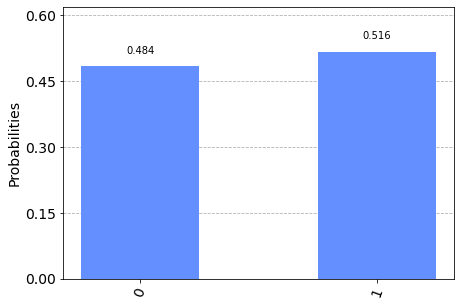

In [12]:
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

Notice the difference between the above two circuits. After we perform the measurement in the second circuit, it collapses the qubit into one of the two classical bits. Since the Hadamard gate takes the input state and puts it into an equal superposition of both the states, we see that the probability is roughly 50% for superposition collapsing into each of it's basis states. Also, since we have used the qasm simulator, which mimics a real noisy quantum computer, the probability is not precisely 50%.

### Pauli -X Gate 


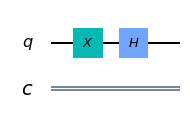

In [13]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.h(0)
circuit.draw('mpl')

This time, we'll look at a different simulator to run this called the state vector simulator. This simulator returns the quantum state, a complex vector of dimensions $2^n$ where $n$ is the number of qubits used.

Since the statevector only returns the quantum state and measuring the quantum state will collapse the system into it's basis states.

In [14]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
outputstate = result.get_statevector(circuit, decimals=4)
print (outputstate)

[ 0.7071-0.j -0.7071+0.j]


This is the quantum state of the system we are in.

Qiskit also offers a beautiful way to plot the real and imaginary components of the state density matrix as follows.


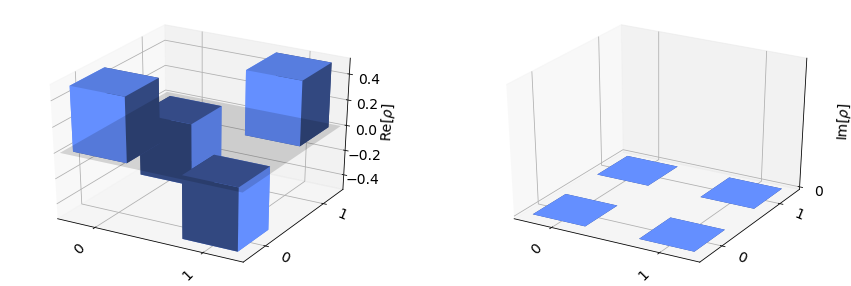

In [15]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Now let us repeat this experiment by having measured the circuit 
beforehand

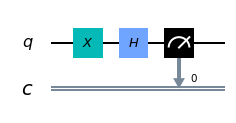

In [16]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.h(0)
circuit.measure(range(1),range(1))
circuit.draw('mpl')

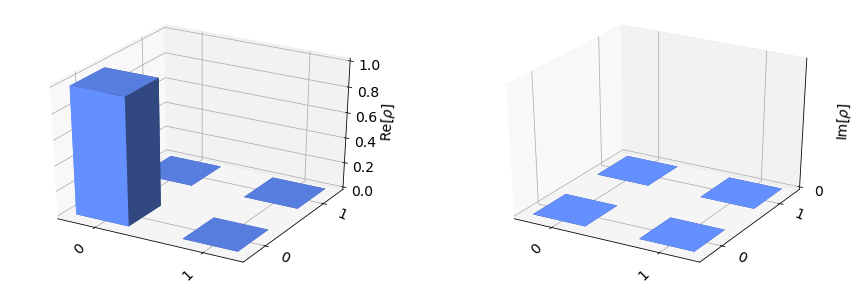

In [17]:
result = execute(circuit, backend=simulator).result()
outputstate = result.get_statevector(circuit, decimals=4)
plot_state_city(outputstate)